<a href="https://colab.research.google.com/github/jre98/TensorFlow-Simple-Handwritten-Digit-Recognition/blob/main/TensorFlow_for_Simple_Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Code Block for Part 1 - Training a Fully Connected Neural Network**










*Part 1a) Import libraries, load and flatten data, and split into Training and Test Sets.*

In [ ]:
# Import necessary libraries
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as mpl
import random as rand

# Load dataset
all_digits = datasets.load_digits()
# Determine the number of samples we have for reshaping data
n_samples = len(all_digits.images)
# Actually flatten the data; use -1 as the second argument in order to automatically 
# determine the number of columns based on the size of the original image
data = all_digits.images.reshape((n_samples, -1))

# Separate data into training sets and test sets with a 20% split
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(data, all_digits.target, test_size = 0.2)



*Part 1b) Create, train, and evaluate model on training and test sets. Also get weights and biases for each layer after network is trained.*

In [ ]:
# Define model architecture, we use a sequential model
model = tf.keras.Sequential()

# First layer (only need to specify input_shape a single time in the first layer)
model.add(tf.keras.layers.Dense(25, input_shape=(X_train.shape[1],), activation = 'sigmoid'))

# Second layer
model.add(tf.keras.layers.Dense(40, activation = 'sigmoid'))

# Third layer
model.add(tf.keras.layers.Dense(25, activation = 'sigmoid'))

# Output Layer - Has 10 units/neurons as there are 10 possible classes each image could fall
# into (numbers 0 through 9). Uses softmax instead of sigmoid, as this gave best predictions
output_layer = model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


# Compile model
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, Y_train, epochs=25, batch_size=15)

# Get weights and biases at each layer in the network
W1 = model.layers[0].get_weights()[0]
B1 = model.layers[0].get_weights()[1]

W2 = model.layers[1].get_weights()[0]
B2 = model.layers[1].get_weights()[1]

W3 = model.layers[2].get_weights()[0]
B3 = model.layers[2].get_weights()[1]

W_output = model.layers[3].get_weights()[0]
B_output = model.layers[3].get_weights()[1]



# evaluate model on training set
print("\n\nEvaluating Model on training set:")
train_loss, train_acc = model.evaluate(X_train, Y_train)

# evaluate model on test set
print("\n\nEvaluating model on test set:")
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Use predict method to predict the values in X_test for use in plotting later
keras_output = model.predict(X_test)
keras_predictions = np.argmax(keras_output, axis=1)





Epoch 1/25
96/96 [==============================] - 1s 2ms/step - loss: 2.3144 - accuracy: 0.1441
Epoch 2/25
96/96 [==============================] - 0s 2ms/step - loss: 2.1917 - accuracy: 0.4482
Epoch 3/25
96/96 [==============================] - 0s 2ms/step - loss: 2.0375 - accuracy: 0.5839
Epoch 4/25
96/96 [==============================] - 0s 2ms/step - loss: 1.8049 - accuracy: 0.6994
Epoch 5/25
96/96 [==============================] - 0s 2ms/step - loss: 1.5504 - accuracy: 0.7265
Epoch 6/25
96/96 [==============================] - 0s 2ms/step - loss: 1.3186 - accuracy: 0.7857
Epoch 7/25
96/96 [==============================] - 0s 2ms/step - loss: 1.1156 - accuracy: 0.8281
Epoch 8/25
96/96 [==============================] - 0s 2ms/step - loss: 0.9415 - accuracy: 0.8573
Epoch 9/25
96/96 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.8852
Epoch 10/25
96/96 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.9144
Epoch 11/25
96/96 [

As we can see from the results of running the above cells, the network gradually increases its accuracy on the training set with each run through the epoch, eventually reaching accuracy of >90% on the training set. When evaluated on the test set, the model is >90% accurate as well, although its accuracy is less than on the training set. This is to be expected, as the model has not seen the test set, and it would not be reasonable to expect 100% accuracy.

### **Code Block for Part 2 - Implementing Forward Poropagation using Numpy**


*Part 2a) define functions that will be used by forward propagation algorithm*

In [ ]:
# Define the linear function, this is the dot product of the activations from the
# previous layer and the transposed weights 
def linear(W, A_previous):
  Z = np.dot(A_previous, W.T)
  return Z

# Define the sigmoid activation function (as this is what is used in the first three 
# layers). This is the non-linear part (from book)
def sigmoid(z):
  ans = 1 / (1 + np.exp(-z))
  return ans

# Define softmax function, as this is what is used for the output layer (from book);
# this is also a non-linear function
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum()

# Function to propagate through one layer of the network
def forward_prop(W, B, A_previous, activation_func):
  # Apply the linear function to obtain Z
  Z = linear(W.T, A_previous)
  # Append bias vector to Z after reshaping bias to ensure dimensions match
  Z += B.reshape(1, -1)
  # Append bias term to activation values from previous layer
  A_previous = np.append(A_previous, [1])
  # Apply non-linear activation function to obtain activations
  A = activation_func(Z)
  return A


The reason I chose sigmoid for the first three layers and softmax for the output layer is because I found in the book and online resources that softmax tends to produce the best results as the output layer activation function. As for sigmoid, I found this function to give the most accurate prediction for the model.

*Part 2b) use functions to forward propagate through each layer in the network, then obtain predictions made by network*

In [ ]:
# Using X_test as our input to the network, we forward propagate through the whole 
# network layer by layer

# ~~~~~~ 1st Layer ~~~~~~ #
# Call forward_prop function using initial inputs, then store resulting activations 
A1 = forward_prop(W1, B1, X_test, sigmoid)

# ~~~~~~ 2nd Layer ~~~~~~ #
# Call forward_prop function using previous layer actiavtions, then store 
# resulting activations
A2 = forward_prop(W2, B2, A1, sigmoid)


# ~~~~~~ 3rd Layer ~~~~~~ #
# Call forward_prop function using previous layer actiavtions, then store 
# resulting activations
A3 = forward_prop(W3, B3, A2, sigmoid)

# ~~~~~~ Output Layer ~~~~~~ #
# Call forward_prop function using previous layer actiavtions, then store 
# resulting activations (the outputs of the network)
A_output = forward_prop(W_output, B_output, A3, softmax)


# Now that we have the outputs of the network, we want to find the prediction for
# each value in X_test. We do this by using the argmax function to find the maximum 
# value from each row (hence the axis=1)
# Store these predictions in a variable for comaprison against true values
f_p_predictions = np.argmax(A_output, axis=1)


### **Code Block for Part 3) Compare Accuracies From Part 1) and 2) and Verify Results by Plotting Images**






*Part 3a) Compute accuracy of forward propagation predictions and compare against accuracy of original neural network*

In [ ]:
# Verify that the predictions and X_test arrays are the same size, ensuring that 
# have one prediction for each value in X_test
print("Length of 'predictions' is:" , len(f_p_predictions))
print("Length of 'X_test' is:", len(X_test))

# Find the number of correct predictions, done by determining the number of times
# the values in predictions and Y_test are equal, then summing all these instances 
num_correct = np.sum(f_p_predictions == Y_test)

# Print out how many correct predictions were made
print("The number of correct predictions was:", num_correct)

# Find and store accuracy of forward propagation predictions
f_p_accuracy = (num_correct / len(f_p_predictions))
# Normalize format of percentage for easier readability
f_p_accuracy = round(f_p_accuracy, 4) * 100
print("\nThis represents an accuracy of {}% for the forward propagation predictions.".format(f_p_accuracy))

# Normalize format of test accuracy percentage for easier readability
network_accur = round(test_acc, 4) * 100
print("The test accuracy as given by the neural network model was {}%".format(network_accur))


Length of 'predictions' is: 360
Length of 'X_test' is: 360
The number of correct predictions was: 340

This represents an accuracy of 94.44% for the forward propagation predictions.
The test accuracy as given by the neural network model was 94.44%


As we can see from the output above, the accuracies are the same when predicted by the Keras library and the forward propagation implementation.

*Part 3b) Plot images of several results from each class to verify results*

The Keras neural network predicted this value to be a: 7
The forward propagation algorithm predicted this value to be a: 7
The actual target value (true value) is a: 7


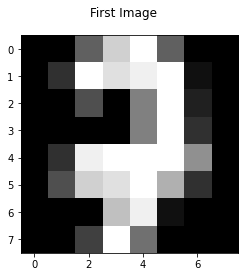

In [ ]:
# Plotting first randomly chosen value

# Choose a random index in the range of the size of X_test
rand_index = rand.randint(0, len(X_test))
# Reshape value at that index into an 8x8 array to plot it
temp = X_test[rand_index].reshape(8, 8)
# Plot the image and add a title
mpl.imshow(temp, "gray")
mpl.gcf().suptitle("First Image")

# Print out the predicted values from the Keras model and the forward propagation 
# algorithm, in addition to the true target value
print("The Keras neural network predicted this value to be a: {}".format(keras_predictions[rand_index]))
print("The forward propagation algorithm predicted this value to be a: {}".format(f_p_predictions[rand_index]))
print("The actual target value (true value) is a: {}".format(Y_test[rand_index]))

The Keras neural network predicted this value to be a: 7
The forward propagation algorithm predicted this value to be a: 7
The actual target value (true value) is a: 1


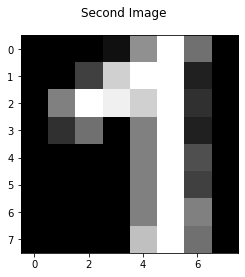

In [ ]:
# Plotting second randomly chosen value

# Choose a random index in the range of the size of X_test
rand_index = rand.randint(0, len(X_test))
# Reshape value at that index into an 8x8 array to plot it
temp = X_test[rand_index].reshape(8, 8)
# Plot the image and add a title
mpl.imshow(temp, "gray")
mpl.gcf().suptitle("Second Image")

# Print out the predicted values from the Keras model and the forward propagation 
# algorithm, in addition to the true target value
print("The Keras neural network predicted this value to be a: {}".format(keras_predictions[rand_index]))
print("The forward propagation algorithm predicted this value to be a: {}".format(f_p_predictions[rand_index]))
print("The actual target value (true value) is a: {}".format(Y_test[rand_index]))

The Keras neural network predicted this value to be a: 1
The forward propagation algorithm predicted this value to be a: 1
The actual target value (true value) is a: 1


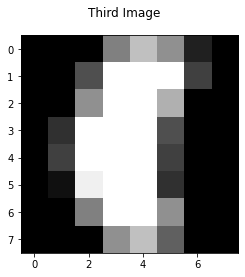

In [ ]:
# Plotting third randomly chosen value

# Choose a random index in the range of the size of X_test
rand_index = rand.randint(0, len(X_test))
# Reshape value at that index into an 8x8 array to plot it
temp = X_test[rand_index].reshape(8, 8)
# Plot the image and add a title
mpl.imshow(temp, "gray")
mpl.gcf().suptitle("Third Image")

# Print out the predicted values from the Keras model and the forward propagation 
# algorithm, in addition to the true target value
print("The Keras neural network predicted this value to be a: {}".format(keras_predictions[rand_index]))
print("The forward propagation algorithm predicted this value to be a: {}".format(f_p_predictions[rand_index]))
print("The actual target value (true value) is a: {}".format(Y_test[rand_index]))

The Keras neural network predicted this value to be a: 4
The forward propagation algorithm predicted this value to be a: 4
The actual target value (true value) is a: 4


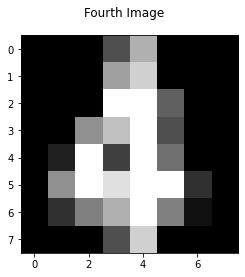

In [ ]:
# Plotting fourth randomly chosen value

# Choose a random index in the range of the size of X_test
rand_index = rand.randint(0, len(X_test))
# Reshape value at that index into an 8x8 array to plot it
temp = X_test[rand_index].reshape(8, 8)
# Plot the image and add a title
mpl.imshow(temp, "gray")
mpl.gcf().suptitle("Fourth Image")

# Print out the predicted values from the Keras model and the forward propagation 
# algorithm, in addition to the true target value
print("The Keras neural network predicted this value to be a: {}".format(keras_predictions[rand_index]))
print("The forward propagation algorithm predicted this value to be a: {}".format(f_p_predictions[rand_index]))
print("The actual target value (true value) is a: {}".format(Y_test[rand_index]))